In [2]:
import numpy as np
import pandas as pd

# numpy 소수점 4째자리까지 표현
np.set_printoptions(precision=4)

### 데이터셋 가져오기

In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# print(data)

**컬럼 소개 (California Housing Dataset)**

행의 수 : 20640 <br>
컬럼 수 : 8 

* **MedInc**: 블록 그룹의 중간 소득
* **HouseAge**: 블록 그룹의 중간 주택 연령
* **AveRooms**: 가구당 평균 방 수
* **AveBedrms**: 가구당 평균 침실 수
* **Population**: 블록 그룹 인구
* **AveOccup**: 가구당 평균 거주자 수
* **Latitude**: 블록 그룹 위도
* **Longitude**: 블록 그룹 경도
* **MedHouseVal**: 중간 주택 가격 (타겟, $100,000 단위)

### 데이터프레임으로 만들기

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df['MedHouseVal'] = data['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 지도위에 데이터를 시각화 

In [ ]:
import folium
import branca.colormap as cm

# 위도, 경도의 평균을 중심으로 지도 생성
center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=center, zoom_start=6)

# 데이터가 많으므로 일부만 샘플링하여 시각화 (예: 1000개)
sample_df = df.sample(n=1000, random_state=42)

# 가격에 따른 색상 매핑 함수 (Linear Colormap)
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], 
                             index=[sample_df['MedHouseVal'].min(), sample_df['MedHouseVal'].max()],
                             vmin=sample_df['MedHouseVal'].min(),
                             vmax=sample_df['MedHouseVal'].max())
colormap.caption = 'Median House Value'
colormap.add_to(m)

for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # 반지름은 고정 (가격과 무관)
        color=colormap(row['MedHouseVal']),
        fill=True,
        fill_color=colormap(row['MedHouseVal']),
        fill_opacity=0.7,
        tooltip=f"Price: {row['MedHouseVal']}"
    ).add_to(m)

In [11]:
m

### 데이터를 분할(train_test_split)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

### 평가지표(MSE,MAE,RMSE,R2)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# plot_predictions : 예측값과 실제값을 산점도로 비교하여 시각화
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# mse 기준으로 모델의 성능 평가를 해주는 함수
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    # 산점도를 그려주고(예측값, 정답값)
    plot_predictions(name_, pred, actual)

    # mse 계산 출력
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    # 모델별 성능을 비교하기 위해 sorted
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    # 모델들을 비교해서 barh로 그려준다.
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# 리스트에 있는 모델중에 하나를 삭제하는 함수
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### LinearRegression

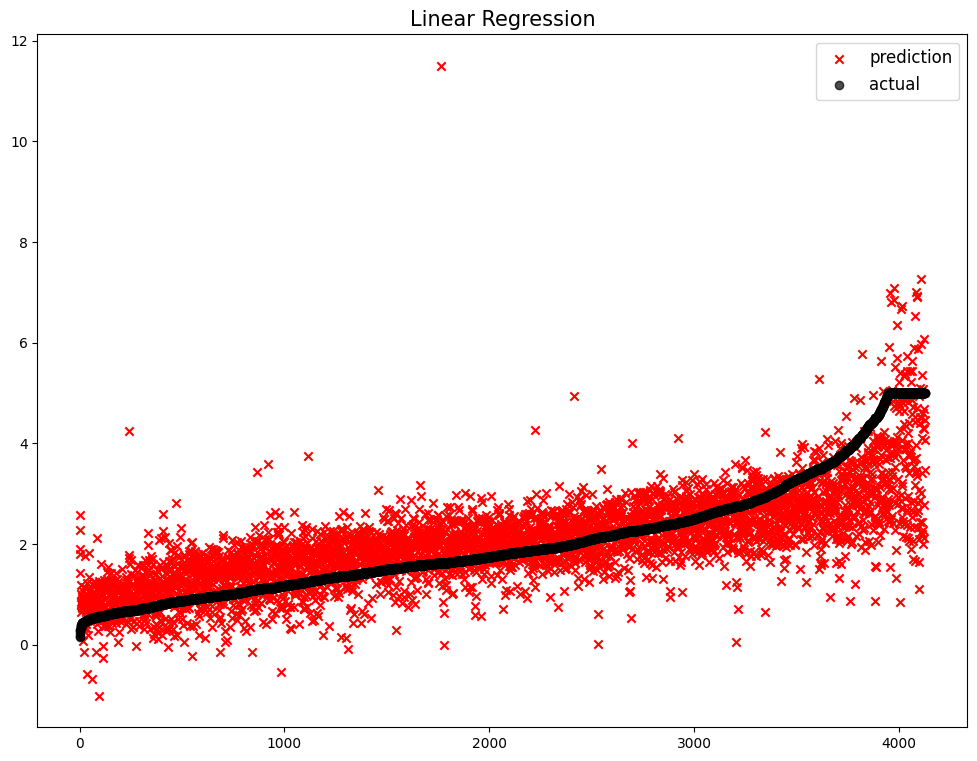

               model       mse
0  Linear Regression  0.555892


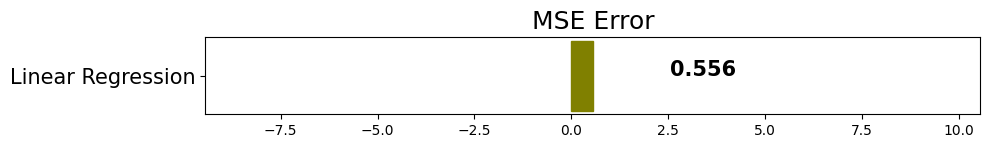

In [16]:
# 1. 모델 생성
linear_reg = LinearRegression(n_jobs=-1)

# 2. 모델 학습
linear_reg.fit(X_train, y_train)

# 3. 모델 예측
y_pred = linear_reg.predict(X_test)

# 4. 모델 평가
mse_eval('Linear Regression',y_pred, y_test)

### Ridge

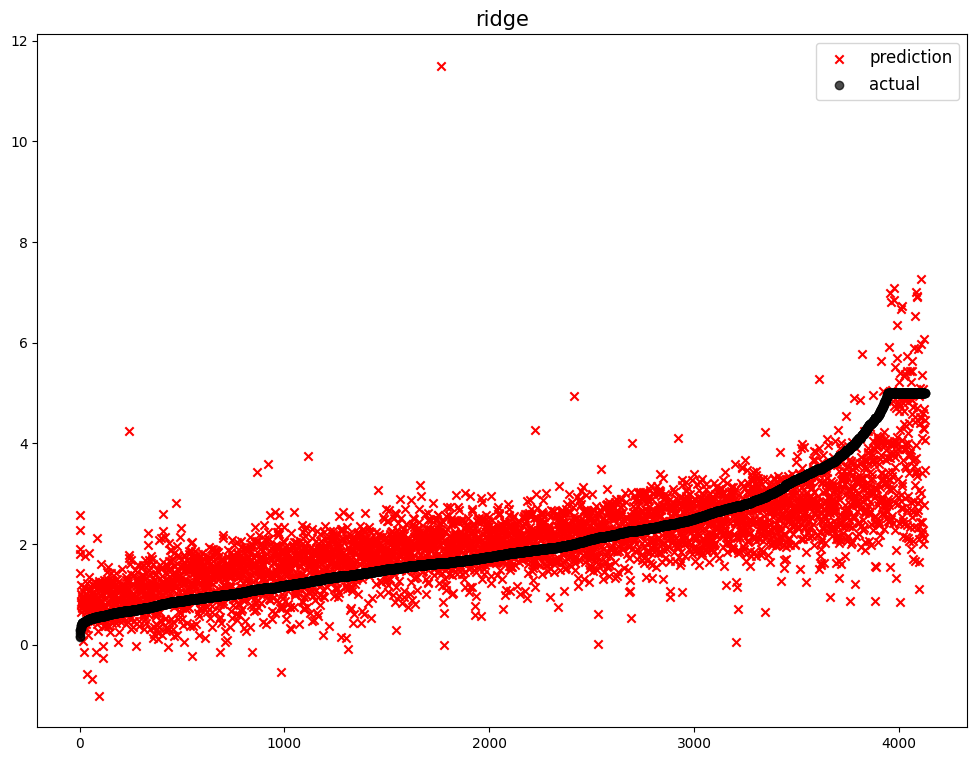

               model       mse
0  Linear Regression  0.555892
1              ridge  0.555892


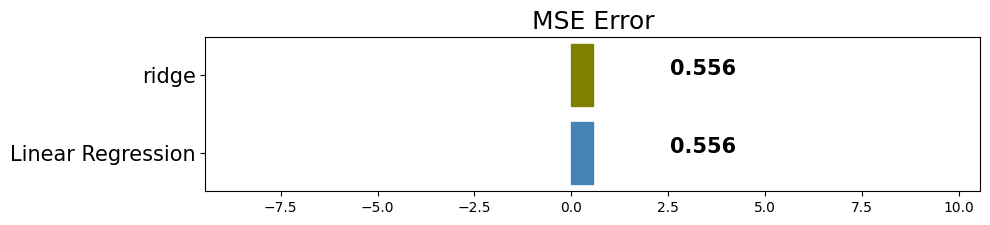

In [17]:
# 1. 모델 생성
ridge = Ridge(alpha=0.001)

# 2. 모델 학습
ridge.fit(X_train, y_train)

# 3. 모델 예측
y_pred = ridge.predict(X_test)

# 4. 모델 평가
mse_eval('ridge',y_pred, y_test)

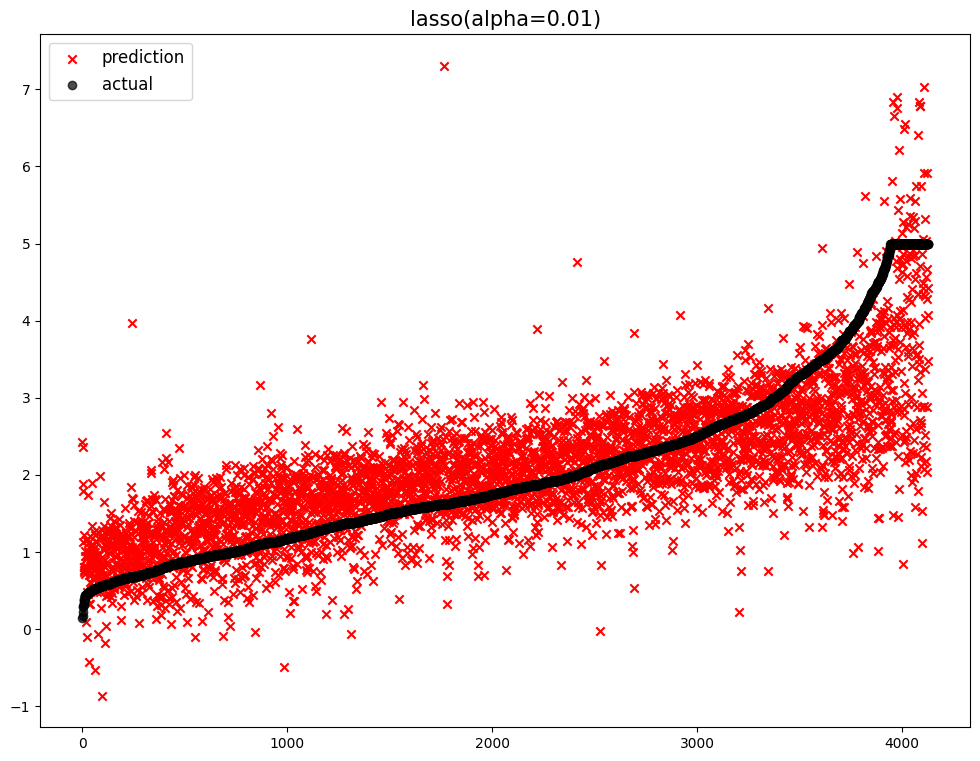

                                 model       mse
0   STD elastic(alpha=0.5,l1_raio=0.1)  0.732531
1    elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
2   STD elastic(alpha=0.1,l1_raio=0.1)  0.590975
3                    lasso(alpha=0.05)  0.564626
4                    Linear Regression  0.555892
5                                ridge  0.555892
6                   lasso(alpha=0.001)  0.553894
7                     voting_regressor  0.548854
8                    lasso(alpha=0.01)  0.544449
9                                  gbr  0.302871
10             random forest regressor  0.254967


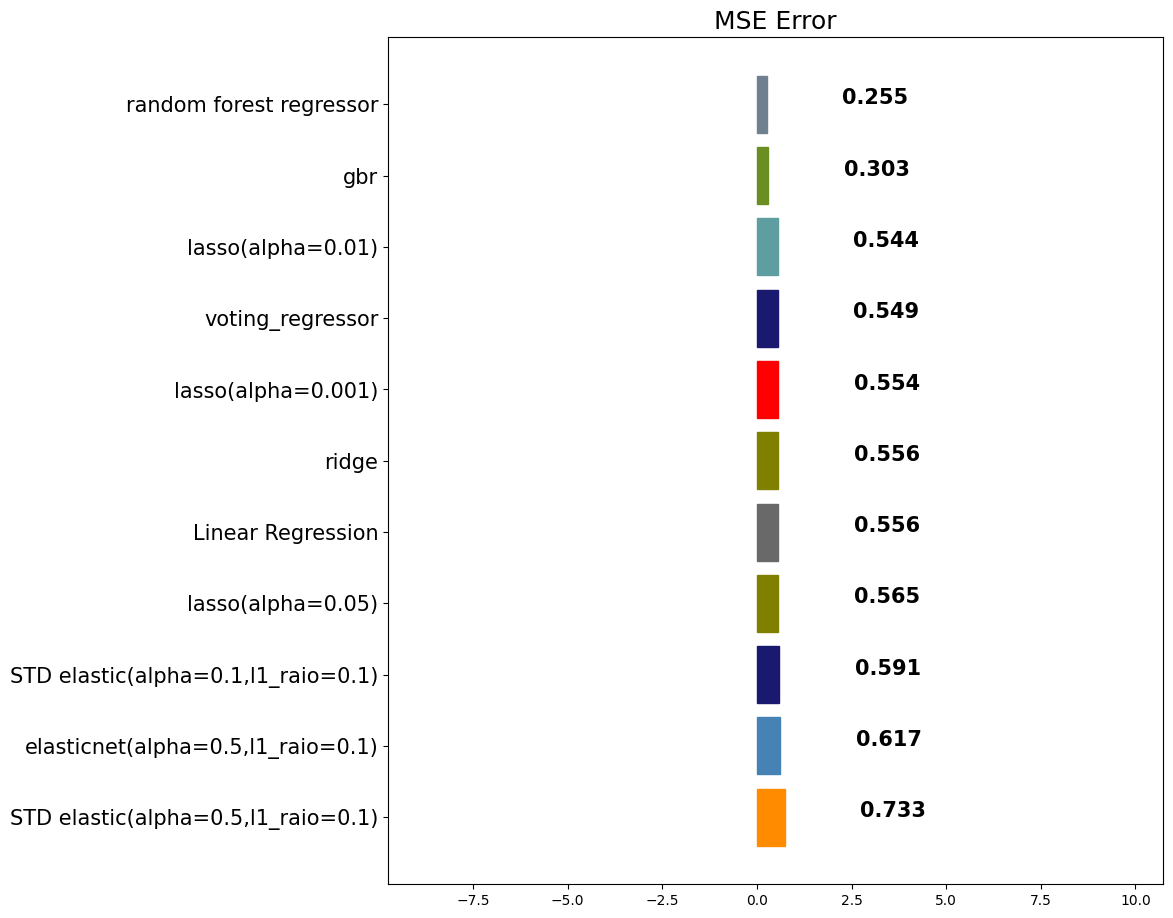

In [55]:
# 1. 모델 생성
lasso = Lasso(alpha=0.01)

# 2. 모델 학습
lasso.fit(X_train, y_train)

# 3. 모델 예측
y_pred = lasso.predict(X_test)

# 4. 모델 평가
mse_eval('lasso(alpha=0.01)',y_pred, y_test)

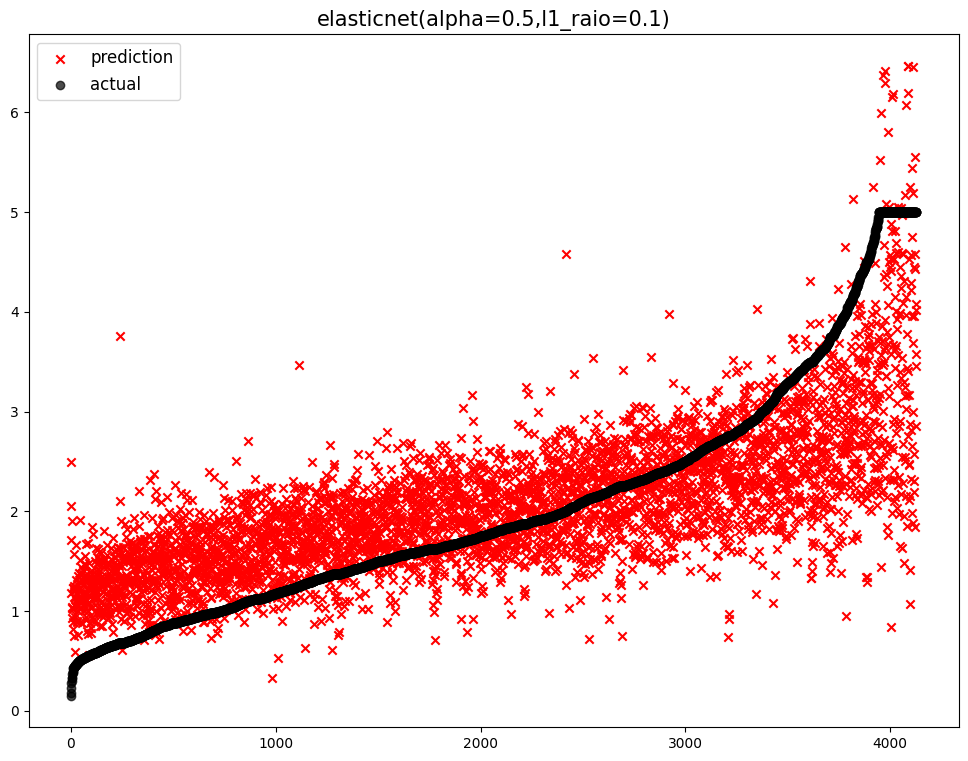

                               model       mse
0  elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
1                  Linear Regression  0.555892
2                              ridge  0.555892
3                 lasso(alpha=0.001)  0.553894
4                  lasso(alpha=0.01)  0.544449


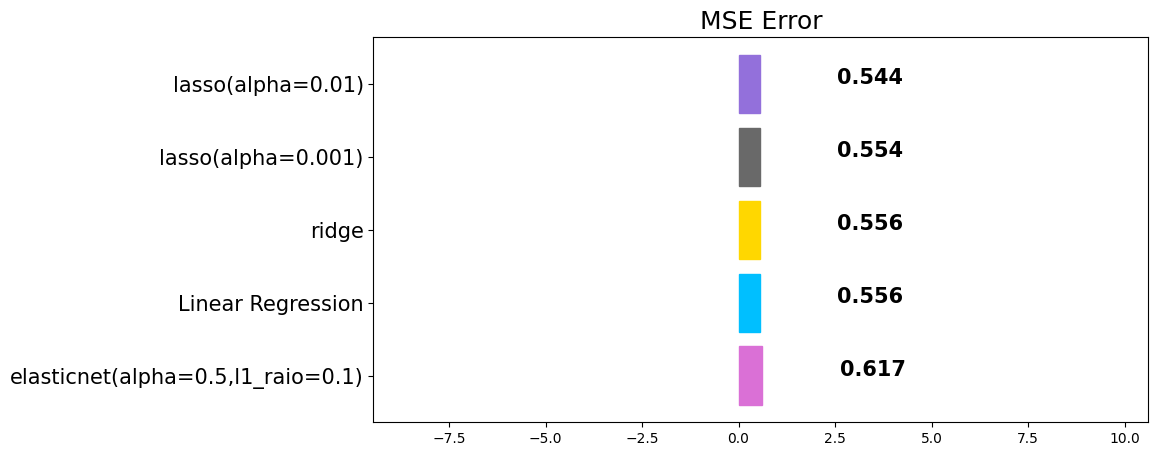

In [20]:
# 1. 모델 생성
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.1)

# 2. 모델 학습
elasticnet.fit(X_train, y_train)

# 3. 모델 예측
y_pred = elasticnet.predict(X_test)

# 4. 모델 평가
mse_eval('elasticnet(alpha=0.5,l1_raio=0.1)',y_pred, y_test)

### PipeLine

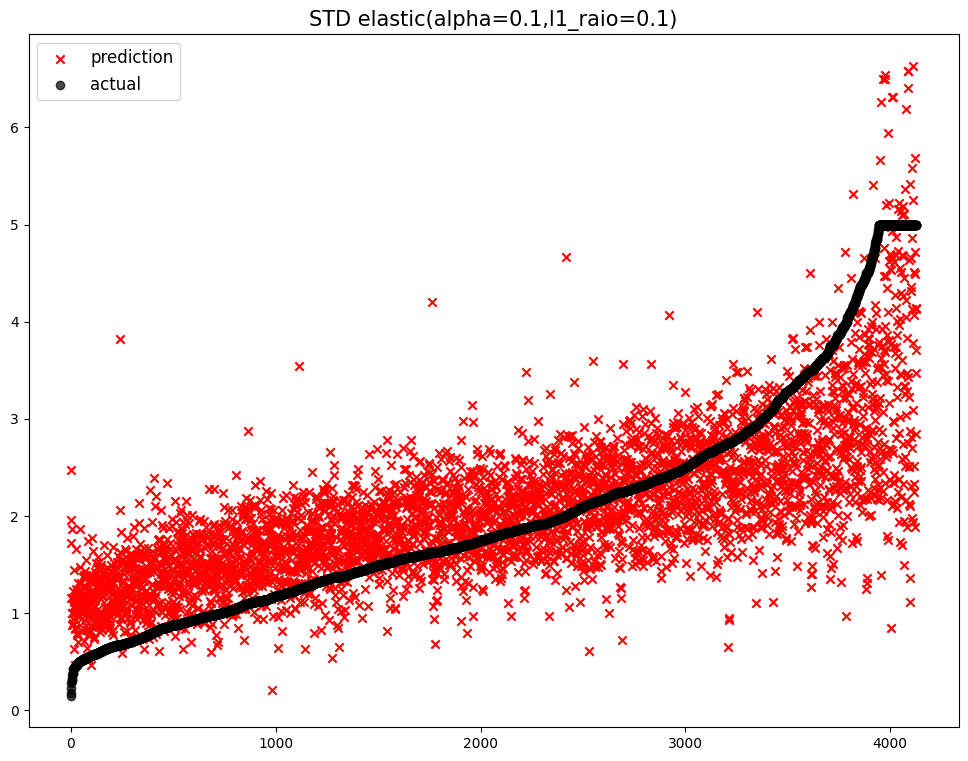

                                model       mse
0  STD elastic(alpha=0.5,l1_raio=0.1)  0.732531
1   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
2  STD elastic(alpha=0.1,l1_raio=0.1)  0.590975
3                   lasso(alpha=0.05)  0.564626
4                   Linear Regression  0.555892
5                               ridge  0.555892
6                  lasso(alpha=0.001)  0.553894
7                   lasso(alpha=0.01)  0.544449


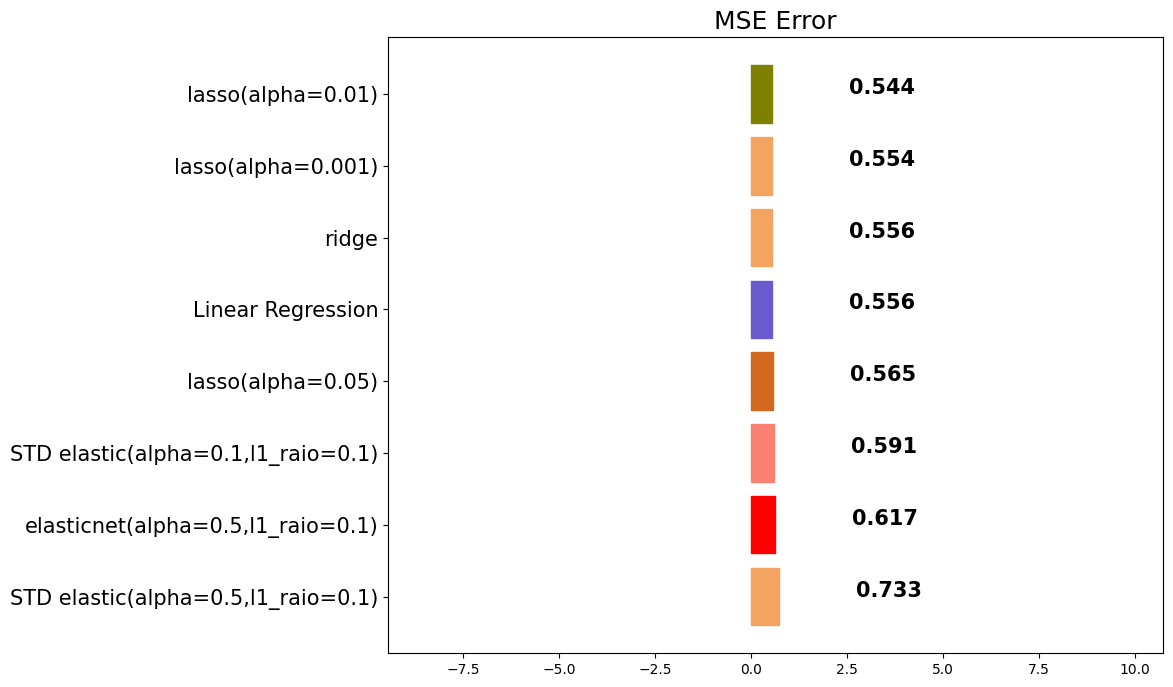

In [29]:
# 1. (파이프 라인)모델 생성
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.1)
)

# 2. 모델 학습
elasticnet_pipeline.fit(X_train, y_train)

# 3. 모델 예측
y_pred = elasticnet_pipeline.predict(X_test)

# 4. 모델 평가
mse_eval('STD elastic(alpha=0.1,l1_raio=0.1)',y_pred, y_test)

## **앙상블(Ensemble) 모델**

### Voting Regressor

In [34]:
from sklearn.ensemble import VotingRegressor

# 앞에서 학습이 완료된 모델을 가져오기
single_models = [ 
    ('lasso', lasso),
    ('ridge', ridge),
    ('linear_reg',linear_reg),
    ('std_elastic', elasticnet_pipeline)    
]

# 1. 모델 생성
voting_reg = VotingRegressor(single_models, n_jobs=-1)

# 2. 모델 학습
voting_reg.fit(X_train, y_train)


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingRegressor`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('lasso', ...), ('ridge', ...), ...]"
,"weights weights: array-like of shape (n_regressors,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted values before averaging. Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False


In [ ]:
# 3. 모델 예측
y_pred = voting_reg.predict(X_test)

# 4. 모델 평가
mse_eval('voting_regressor',y_pred, y_test)

### Bagging방식의 ensemble
Bootstrap AGGregatING : BAGGING

#### Randomg Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

# 1. 모델 생성
rf_reg = RandomForestRegressor()

# 2. 모델 학습
rf_reg.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

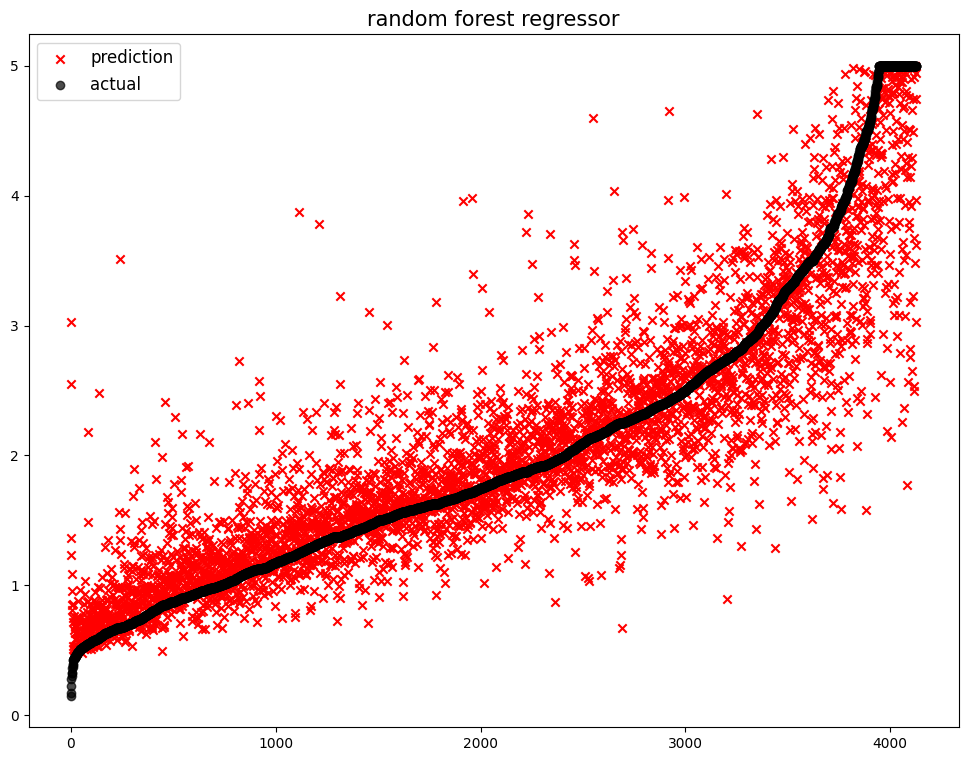

                                model       mse
0  STD elastic(alpha=0.5,l1_raio=0.1)  0.732531
1   elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
2  STD elastic(alpha=0.1,l1_raio=0.1)  0.590975
3                   lasso(alpha=0.05)  0.564626
4                   Linear Regression  0.555892
5                               ridge  0.555892
6                  lasso(alpha=0.001)  0.553894
7                    voting_regressor  0.548854
8                   lasso(alpha=0.01)  0.544449
9             random forest regressor  0.254967


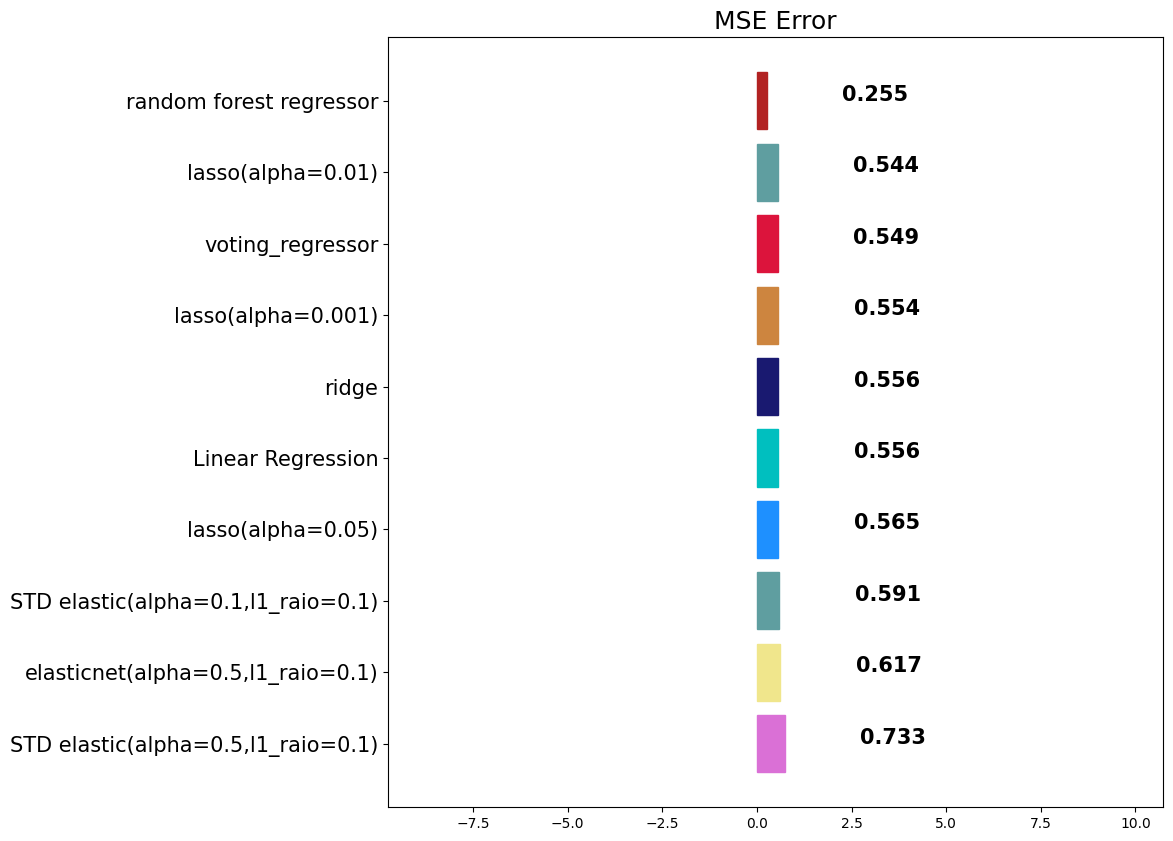

In [37]:
# 3. 모델 예측
y_pred = rf_reg.predict(X_test)

# 4. 모델 평가
mse_eval('random forest regressor',y_pred, y_test)

### GridSearchCV로 rf_reg를 하이퍼파라메터 튜닝
**나중에 다음과 같은 라이브러리도 사용해 보기를 권장**<br>
AutoML 혹은 자동 하이퍼파라메터 튜닝 : Optuna, H2O, Autogluon(AWS)

In [43]:
from sklearn.model_selection import GridSearchCV

# 1. RF 모델 생성
rf_reg_cv = RandomForestRegressor(random_state=42)
param_grid = { # 5*7=35가지 조합 학습하고 비교
    'n_estimators': [500,600,700,800,900],
    'max_depth': [None]
    }
# GridSearchCV 모델 생성 
grid_rg_reg = GridSearchCV(rf_reg_cv, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 2. 모델 학습
grid_rg_reg.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None], 'n_estimators': [500, 600, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also 

In [44]:
scores_df = pd.DataFrame(grid_rg_reg.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score','split3_test_score', 'split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': None, 'n_estimators': 500}",-0.258721,1,-0.260394,-0.265553,-0.253890,-0.251713,-0.262055
1,"{'max_depth': None, 'n_estimators': 600}",-0.258937,3,-0.260582,-0.265181,-0.254416,-0.251730,-0.262776
2,"{'max_depth': None, 'n_estimators': 700}",-0.258965,5,-0.260726,-0.265213,-0.254553,-0.251607,-0.262725
3,"{'max_depth': None, 'n_estimators': 800}",-0.258928,2,-0.261050,-0.265364,-0.254499,-0.251548,-0.262177
4,"{'max_depth': None, 'n_estimators': 900}",-0.258947,4,-0.260489,-0.265240,-0.254788,-0.251656,-0.262561


In [45]:
print('GridSearch 최적 파라미터: ', grid_rg_reg.best_params_)
print('GridSearch 최고 점수: ', grid_rg_reg.best_score_)

GridSearch 최적 파라미터:  {'max_depth': None, 'n_estimators': 500}
GridSearch 최고 점수:  -0.25872105408299667


In [ ]:
# 3. 모델 예측
y_pred = grid_rg_reg.predict(X_test)

# 4. 모델 평가
mse_eval('RF GridSearchCV', y_pred, y_test)

### 부스팅(Boosting)
* 부스팅은 여러 개의 약한 학습기를 순차적으로 학습시켜서 최종적으로 강한 학습기를 만드는 방법.
* 장점 : 성능이 뛰어나고, 별도의 특성 선택이 필요하지 않음.
* 단점 : 잘못된 레이블링이나, 이상치(Outlier)에 민감할 수 있다. -> 과적합(Overfitting)이 발생

GBM, AdaBoost, XGBoost, LightGBM

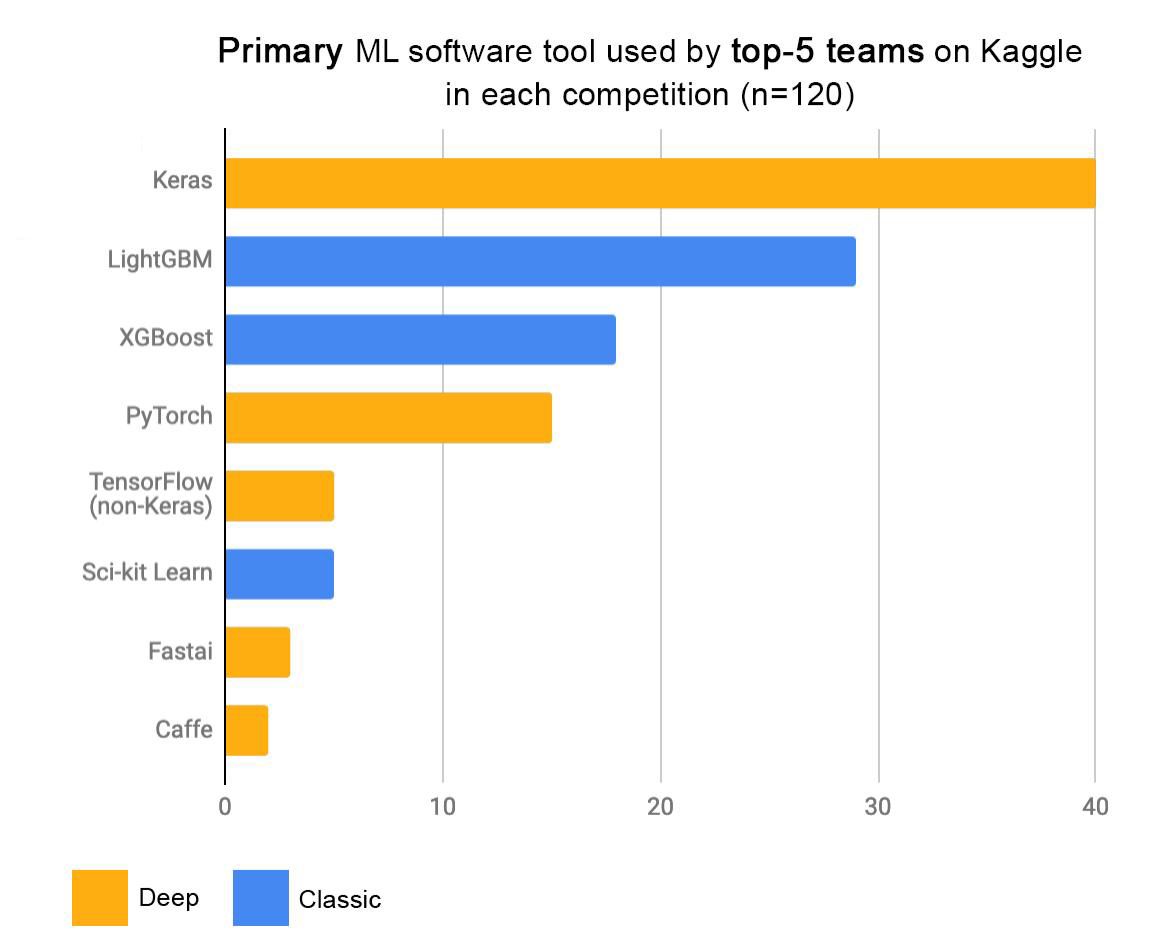

In [48]:
from IPython.display import Image
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=600)

#### GBM

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. 모델 생성
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)

# 2. 모델 학습
gbr.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",200
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",2
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

### 연습용 데이터셋을 만들어서 GBM 시각화

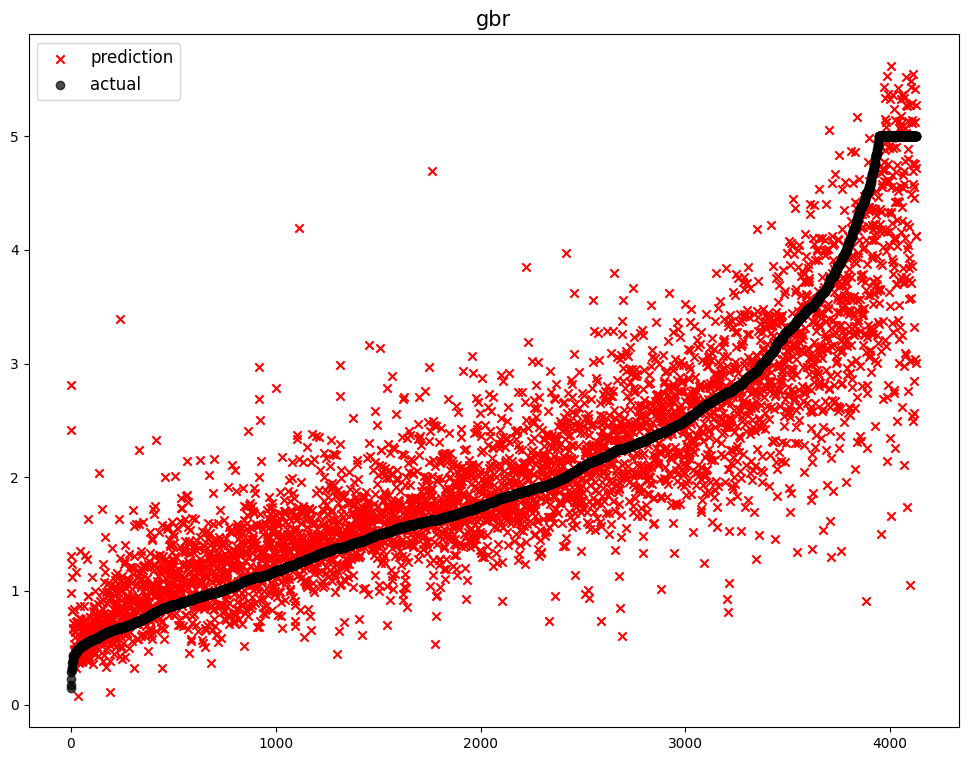

                                 model       mse
0   STD elastic(alpha=0.5,l1_raio=0.1)  0.732531
1    elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
2   STD elastic(alpha=0.1,l1_raio=0.1)  0.590975
3                    lasso(alpha=0.05)  0.564626
4                    Linear Regression  0.555892
5                                ridge  0.555892
6                   lasso(alpha=0.001)  0.553894
7                     voting_regressor  0.548854
8                    lasso(alpha=0.01)  0.544449
9                                  gbr  0.302871
10             random forest regressor  0.254967


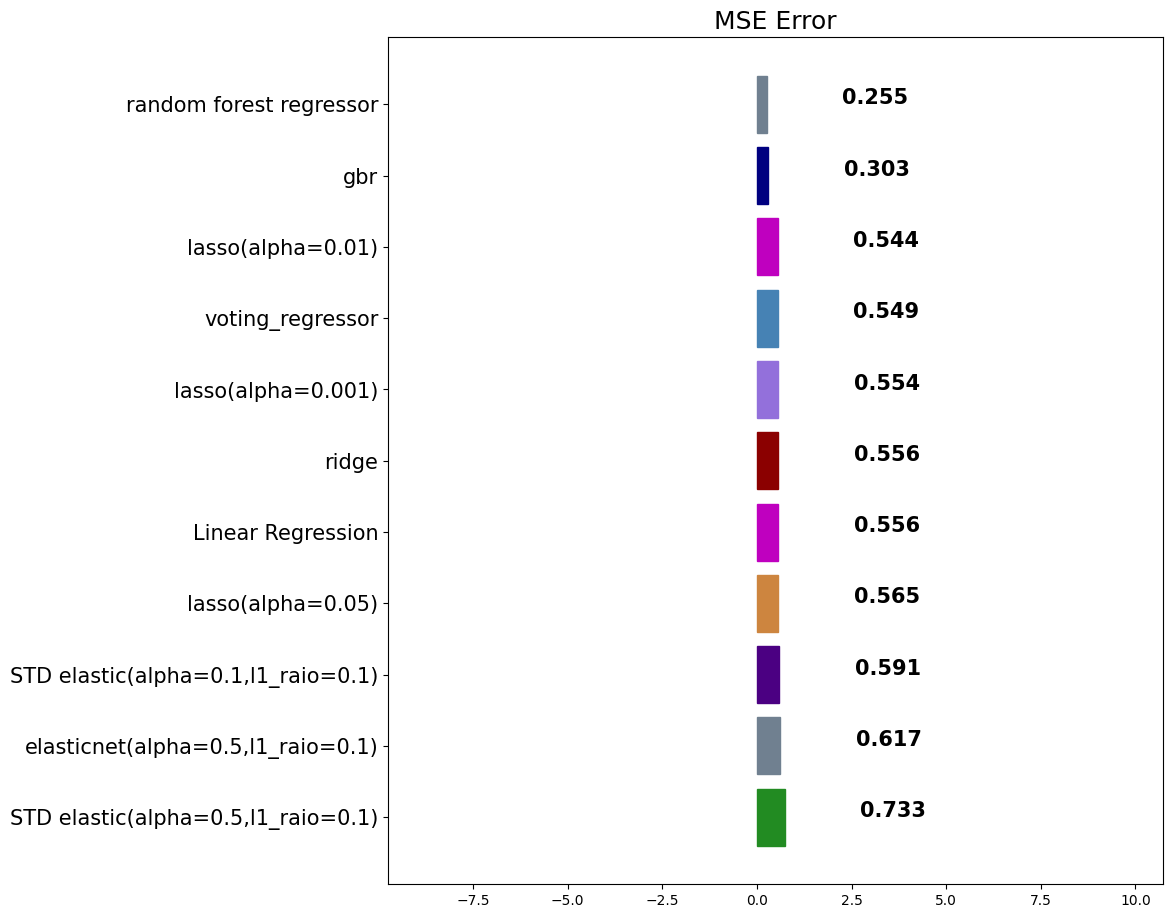

In [75]:
# 3. 모델 예측
y_pred = gbr.predict(X_test)

# 4. 모델 평가
mse_eval('gbr', y_pred, y_test)

### XGBoost

In [ ]:
# xgboost는 sklearn안에 기본 알고리즘이 아니다.
!pip install xgboost

In [77]:
# XGBoost
from xgboost import XGBRegressor

# 1. 모델 생성
xgb_reg = XGBRegressor(random_state=42, learning_rate=0.01, max_depth=7, n_estimators=500, subsample=0.8)

# 2. 모델 학습
xgb_reg.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

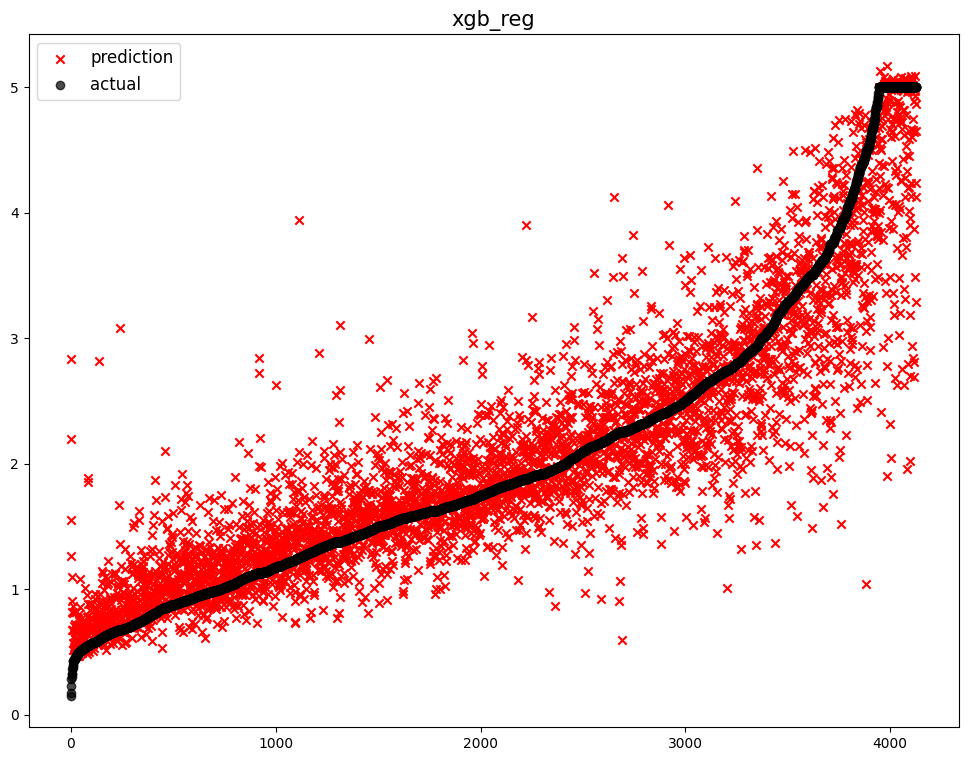

                                 model       mse
0   STD elastic(alpha=0.5,l1_raio=0.1)  0.732531
1    elasticnet(alpha=0.5,l1_raio=0.1)  0.616577
2   STD elastic(alpha=0.1,l1_raio=0.1)  0.590975
3                    lasso(alpha=0.05)  0.564626
4                    Linear Regression  0.555892
5                                ridge  0.555892
6                   lasso(alpha=0.001)  0.553894
7                     voting_regressor  0.548854
8                    lasso(alpha=0.01)  0.544449
9                                  gbr  0.302871
10             random forest regressor  0.254967
11                             xgb_reg  0.234085


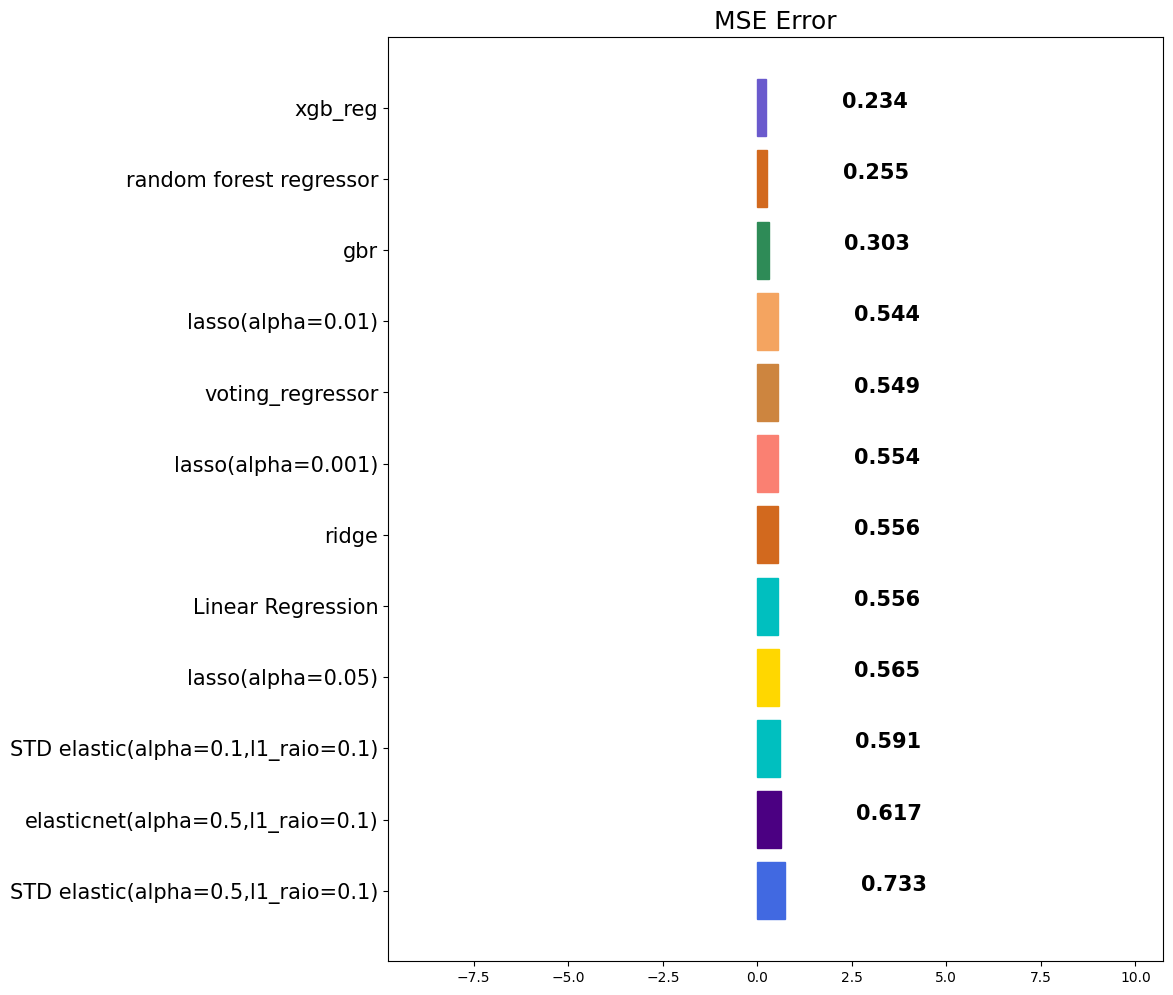

In [78]:
# 3. 모델 예측
y_pred = xgb_reg.predict(X_test)

# 4. 모델 평가
mse_eval('xgb_reg', y_pred, y_test)